# Analyzing the results of Which is better

In [1]:
user = 'Dirk'

park = f"{user}_a_walk_in_the_park_choices_matrix.csv"
mushroom = f"{user}_Mushrooms_GT_choices_matrix.csv"
bottle = f"{user}_Waterbottle_choices_matrix.csv"

In [2]:
import pandas as pd

df = pd.read_csv(mushroom)
df

,Image,images\Mushrooms_GT\catalina_GT - Catalina Diaz.jpeg,images\Mushrooms_GT\Maryam_GT - Maryam Berijanian(1).png,images\Mushrooms_GT\Mushrooms_GT - Dirk Colbry.png,images\Mushrooms_GT\Mushrooms_GT - Katie Reagan.jpeg,images\Mushrooms_GT\Mushrooms_GT.png,images\Mushrooms_GT\Mushrooms_Nathan_Haut_GT - Nathaniel haut.jpeg,images\Mushrooms_GT\Mushrooms_navya_GT - navya bhardwaj.jpeg
0,images\Mushrooms_GT\catalina_GT - Catalina Dia...,0,0,0,0,1,0,1
1,images\Mushrooms_GT\Maryam_GT - Maryam Berijan...,1,0,0,0,1,0,1
2,images\Mushrooms_GT\Mushrooms_GT - Dirk Colbry...,1,1,0,1,1,1,1
3,images\Mushrooms_GT\Mushrooms_GT - Katie Reaga...,1,1,0,0,1,1,1
4,images\Mushrooms_GT\Mushrooms_GT.png,0,0,0,0,0,0,0
5,images\Mushrooms_GT\Mushrooms_Nathan_Haut_GT -...,1,1,0,0,1,0,1
6,images\Mushrooms_GT\Mushrooms_navya_GT - navya...,0,0,0,0,1,0,0


In [3]:
import numpy as np

selected_columns = df.iloc[:, 1:]

# Convert the selected columns to a NumPy matrix
data = np.matrix(selected_columns.values)

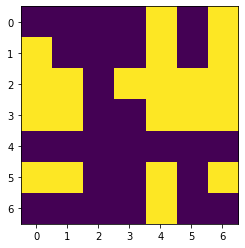

In [4]:
import matplotlib.pylab as plt

plt.imshow(data)

## Code generated by ChatGPT for the ELO algorithm

In [5]:
import numpy as np

def calculate_expected_probability(rating_i, rating_j):
    return 1 / (1 + 10**((rating_j - rating_i) / 400))

def update_ratings(ratings, results, K):
    n = len(ratings)
    
    for i in range(n):
        for j in range(i+1, n):
            expected_prob_i_beats_j = calculate_expected_probability(ratings[i], ratings[j])
            expected_prob_j_beats_i = 1 - expected_prob_i_beats_j
            
            ratings[i] += K * (results[i, j] - expected_prob_i_beats_j)
            ratings[j] += K * (results[j, i] - expected_prob_j_beats_i)
    
    return ratings

def calculate_distance(rating_i, rating_j):
    return abs(rating_i - rating_j)

In [6]:
# Example usage
# Replace the following with your actual data
objects = ["A", "B", "C"]
results = np.array([
    [0, 1, 0],  # A > B
    [0, 0, 1],  # B > C
    [1, 0, 0]   # C > A
])

In [7]:
objects = list(df['Image'])
results = data

Distance Matrix:


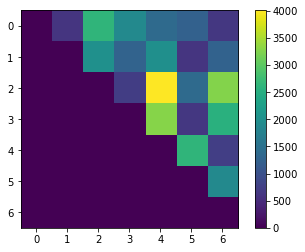

In [8]:
# Initial ratings for each object
initial_ratings = np.zeros(len(objects))

# Choose an appropriate value for K (how much ratings should change with each update)
K = 32

# Number of iterations (adjust as needed)
num_iterations = 1000

# Update ratings iteratively
current_ratings = initial_ratings.copy()
for _ in range(num_iterations):
    current_ratings = update_ratings(current_ratings, results, K)

# Calculate distance between objects based on final ratings
distances = np.zeros((len(objects), len(objects)))
for i in range(len(objects)):
    for j in range(i+1, len(objects)):
        distances[i, j] = calculate_distance(current_ratings[i], current_ratings[j])

print("Distance Matrix:")
plt.imshow(distances)
plt.colorbar()

In [9]:
# Zip the lists together
zipped_lists = list(zip(current_ratings, objects))

# Sort based on the first list
sorted_zipped_lists = sorted(zipped_lists, key=lambda x: x[0])

# Unzip the sorted lists if needed
Final_ratings, objects = zip(*sorted_zipped_lists)

In [10]:
print("Final Ratings:", Final_ratings)


Final Ratings: (-2002.5133118257477, -1267.0121786379673, -617.9494820208321, -0.41979329252154485, 618.0265740187306, 1267.5954704713506, 2002.2727212869788)


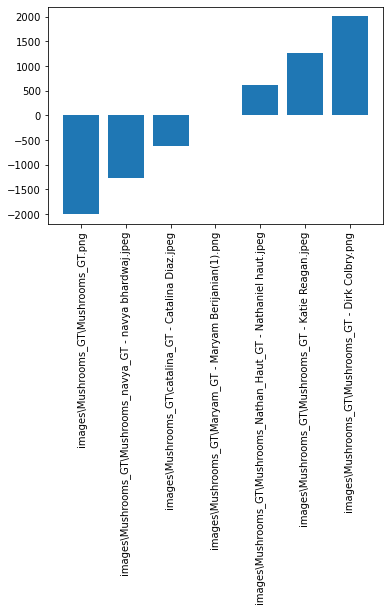

In [11]:
fig, ax = plt.subplots()

ax.bar(objects, Final_ratings)
plt.xticks(rotation=90)
plt.show()

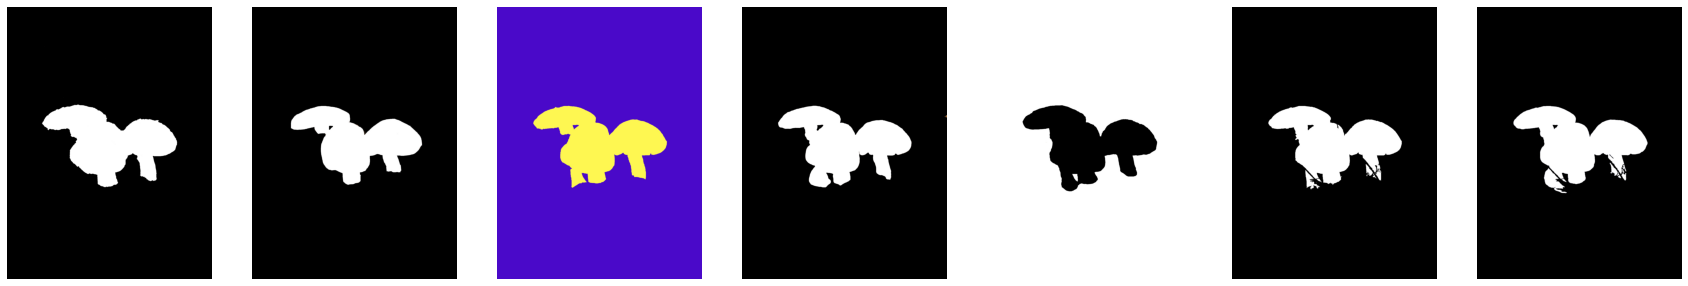

In [12]:
import imageio.v2 as imageio
N = len(objects)
# Create subplots in a single row
fig, axes = plt.subplots(1, N, figsize=(30, 15))  # You can adjust the figure size

# Plot each image in a subplot
for i, ax in enumerate(axes):
    im = imageio.imread(objects[i])
    ax.imshow(im)  # Assuming grayscale images
    ax.axis('off')  # Turn off axis labels